In [1]:
#Import Libraries 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

50.28447449824953
50.481891541517854
50.897712850766055


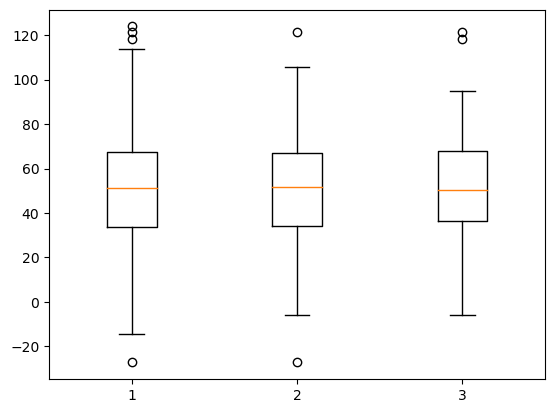

In [2]:
np.random.seed(1663)  # Set seed to allow replication of random data

#Generate population data and samples from population
population = np.random.normal(50, 25, 500)
sample1 = np.random.choice(population, 100)
sample2 = np.random.choice(population, 100)
print(np.mean(population))
print(np.mean(sample1))
print(np.mean(sample2))
plt.boxplot([population, sample1, sample2])
plt.show()

In [3]:
#Z for of given value vs mean of data
data = np.random.normal(50, 12, 1000)  #Generate normally distributed data
mean_d = np.mean(data)  #Mean
std_d = np.std(data)  #Standard deviation
xval = 35  #A random value to test
z = (xval - mean_d) / std_d
print(z)
#Z equals number of standard deviations away from the mean, negative for less than mean, positive for greater than the mean

-1.1797953552634544


49.80152936292837
54.99457384691335


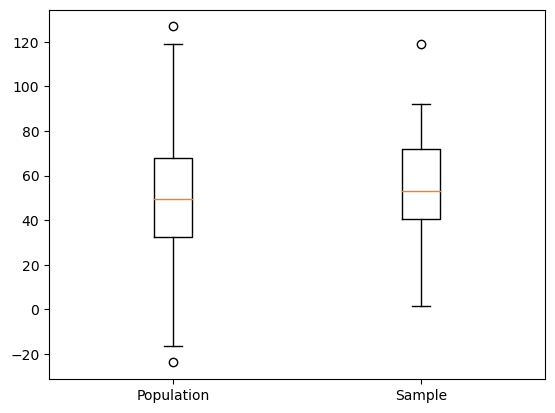

Z is equal to 0.05985403415392288


In [59]:
#One Sample Z Test (Two-Tailed) - Comparing a sample mean to a population mean
#Use Z test if sample size is > 30 and population standard deviation is known
#Z = (Sample Mean - Population Mean) / Population Standard Deviation
population = np.random.normal(50, 25, 500)
sample1 = np.random.choice(population, 50)  #Take a sample from the population
print(np.mean(population))
print(np.mean(sample1))
plt.boxplot([population, sample1], labels=['Population','Sample'])
plt.show()

In [64]:
z = ((np.mean(sample1) - np.mean(population))) / (np.var(population) / np.sqrt(len(sample1)))
cv1tL = stats.norm.ppf(0.05)  #stats.norm.ppf(alpha) gives us our critical value for a one tailed Z test for left tails
cv1tR = stats.norm.ppf(1-0.05)  #stats.norm.ppf(1-alpha) gives us our critical value for a one tailed Z test for right tails
cv2t = abs(stats.norm.ppf(0.05/2)) #stats.norm.ppf(alpha/2) gives us our critical value for a two tailed Z test 
print(f'CV for 1TL is {cv1tL}')
print(f'CV for 1TR is {cv1tR}')
print(f'CV for 2T is {cv2t}')
print(f'Z is equal to {z}')

CV for 1TL is -1.6448536269514729
CV for 1TR is 1.6448536269514722
CV for 2T is 1.9599639845400545
Z is equal to 0.05985403415392288


In [65]:
print('Reject the null hypothesis that the sample mean is equal to the population mean?')
print(z > abs(cv2t))

Reject the null hypothesis that the sample mean is equal to the population mean?
False


In [66]:
#Two Sample (two-tailed) Z Test - Comparing two sample means
#If (mean1 = mean2) then (mean1 - mean2 = 0)
Zn = np.mean(s1) - np.mean(s2) - 0
Zd = np.sqrt(((np.var(s1) / len(s1)) + (np.var(s2) / len(s2))))
Z = Zn / Zd
print(Z)
cv = stats.norm.ppf(1 - 0.05)
print(cv)
print("Reject the null?")
print(abs(Z) > abs(cv))

0.2672135606239808
1.6448536269514722
Reject the null?
False


In [7]:
#Creating a function to conduct a two-sample Z test
def ztester2sample(sample1, sample2, diff, alpha):
    numerator = np.mean(sample1) - np.mean(sample2) - diff
    denominator = np.sqrt((np.var(sample1) / len(sample1)) + (np.var(sample2) / len(sample2)))
    z = numerator / denominator
    cv = stats.norm.ppf(alpha)
    absz = abs(z)
    abscv = abs(cv)
    print("Reject the null?")
    print(absz > abscv)

ztester2sample(s1, s2, 0, 0.05)  # Calling our function

Reject the null?
False


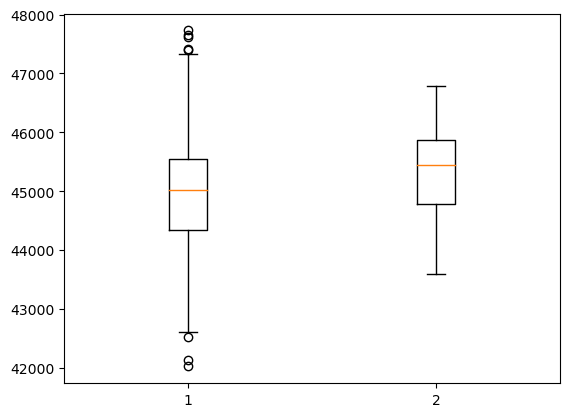

44949.07904421781
45232.76828726323
TtestResult(statistic=1.3159378045236683, pvalue=0.2038520440194867, df=19)


In [67]:
##########T - TESTING - TIME##########
#One Sample T-Test
pop = np.random.normal(45000, 900, 1000)  #Population data
s20 = np.random.choice(pop, 20)  #Sample 20 members of pop
plt.boxplot([pop, s20])
plt.show()
print(np.mean(pop))  #Population mean
print(np.mean(s20))  #Small sample mean
res20 = stats.ttest_1samp(s20, 44973)  #T Test
print(res20)  #Test results

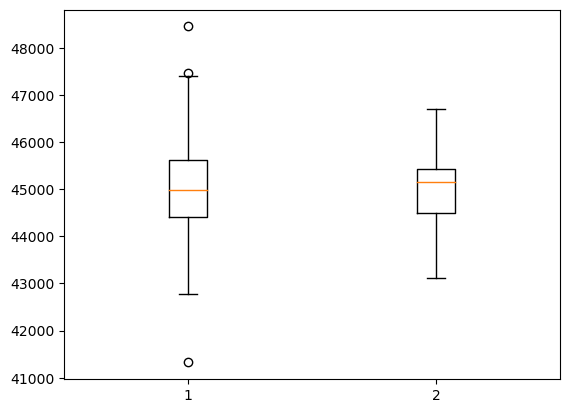

45011.083482509755
TtestResult(statistic=0.33930173615761655, pvalue=0.7358323879296392, df=49)


In [9]:
s50 = np.random.choice(pop, 50)  #Small Sample
plt.boxplot([pop, s50])
plt.show()
print(np.mean(s50))  #Less-small sample
res50 = stats.ttest_1samp(s50, 44973)
print(res50)  #Results

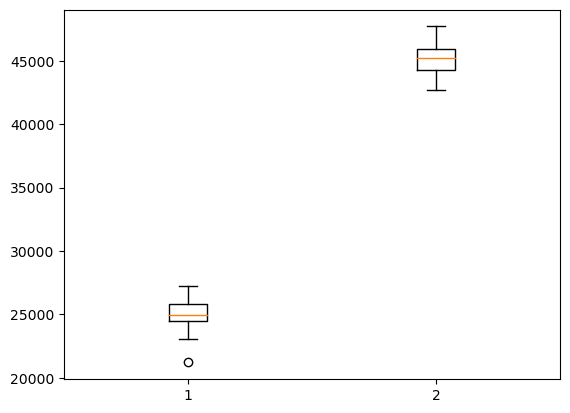

25022.354184320364
45162.936815359964
Ttest_indResult(statistic=-138.32784435490223, pvalue=6.059074442513544e-199)


In [15]:
#Two Sample T-Test
#Generate fake data from a normal distribution, 20k difference
v1 = np.random.normal(25000, 1000, 100)
v2 = np.random.normal(45000, 1000, 100)
plt.boxplot([v1, v2])
plt.show()
#Means
print(np.mean(v1))
print(np.mean(v2))
#Run a "two-sample t-test" to assess the difference in means between two samples
t1 = stats.ttest_ind(v1, v2)
print(t1)  # If p < 2.2e-16, we reject the null with extreme confidence

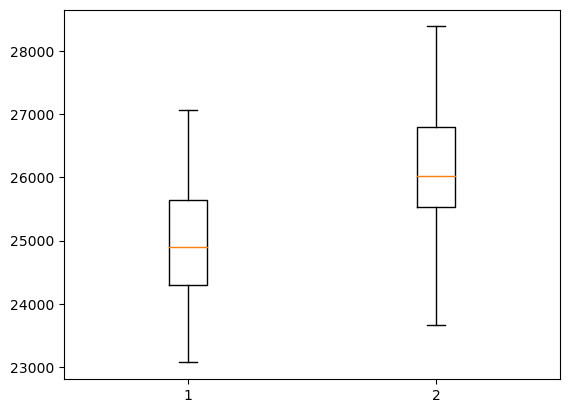

25004.969403821273
26063.892869482246
Ttest_indResult(statistic=-7.8852961466872005, pvalue=2.066803372461447e-13)


In [16]:
#1k difference
v3 = np.random.normal(25000, 1000, 100)
v4 = np.random.normal(26000, 1000, 100)
plt.boxplot([v3, v4])
plt.show()
print(np.mean(v3))
print(np.mean(v4))
t2 = stats.ttest_ind(v3, v4)
print(t2)

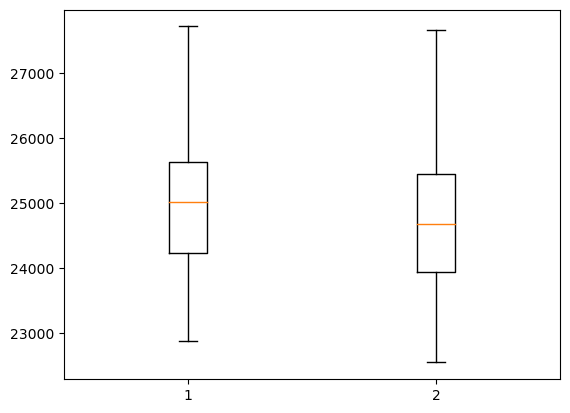

Ttest_indResult(statistic=1.823500613397818, pvalue=0.06973540714244539)


In [17]:
#10 difference
v5 = np.random.normal(25010, 1000, 100)
v6 = np.random.normal(25000, 1000, 100)
plt.boxplot([v5, v6])
plt.show()
t3 = stats.ttest_ind(v5, v6)
print(t3)

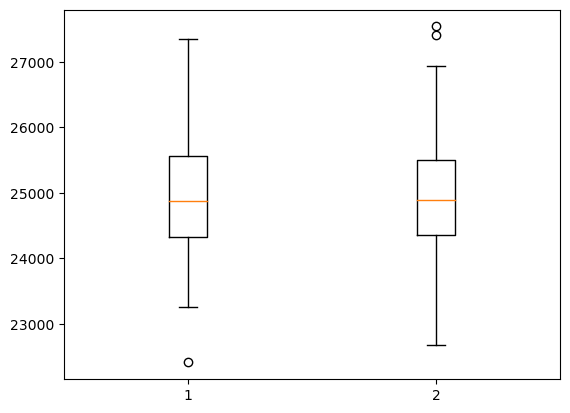

24987.9491432527
24943.201820689414
Ttest_indResult(statistic=0.3529614169409013, pvalue=0.724492836806828)


In [30]:
#0 difference
v7 = np.random.normal(25000, 1000, 100)
v8 = np.random.normal(25000, 1000, 100)
plt.boxplot([v7, v8])
plt.show()
print(np.mean(v7))
print(np.mean(v8))
t4 = stats.ttest_ind(v7, v8)
print(t4)

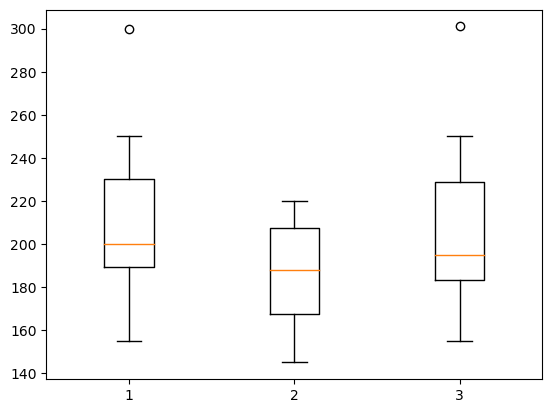

TtestResult(statistic=2.775412375008685, pvalue=0.03219144694665347, df=6)
TtestResult(statistic=1.821374794858189, pvalue=0.11839460264413576, df=6)
[31.66527542 20.34305768 21.50481793 26.51904428 23.13106428 26.10304051
 21.50992546 21.32935217 26.03317511 21.84757455 26.17205635 26.17205635
 25.17690339 25.43793647 26.01035268 28.6676063  28.56276912 24.71204611
 31.66527542 19.32584094 20.95066009 27.38871698 25.1751037  27.37261004
 25.89344692]
[23.47529784 19.52593104 28.37377919 27.51789066 23.22662783 21.59804048
 28.10168135 24.17400437 25.71845179 24.52917206 22.02881267 20.05794632
 17.68681549 25.25646712 20.83313616 20.86793023 24.4659176  21.32935217
 26.52425164 26.03317511 26.36784469 24.02974314 26.84919458 19.12755786
 26.94901929]
TtestResult(statistic=0.0, pvalue=1.0, df=24)
Ttest_indResult(statistic=72.95103115762056, pvalue=4.2364492286338245e-103)
Ttest_indResult(statistic=1.523569740679238, pvalue=0.13417808538139026)


In [14]:
#Paired T Test used when samples don't change
#Sample pre-treatment is the same sample post-treatment
#Example: Group begins a diet program

before = np.array([200, 210, 199, 180, 250, 155, 300])
after1 = np.array([175, 205, 188, 160, 210, 145, 220])
after2 = np.array([190, 208, 195, 177, 250, 155, 301])
plt.boxplot([before, after1, after2])
plt.show()
ttest_before_after1 = stats.ttest_rel(before, after1)
print(ttest_before_after1)
ttest_before_after2 = stats.ttest_rel(before, after2)
print(ttest_before_after2)


#One sample t-test
#stats.ttest_1samp(sample, popmean)
moredata = np.random.normal(25, 3, 500)
moreS1 = np.random.choice(moredata, 25)
moreS2 = np.random.choice(moredata, 25)
print(moreS1)
mean_mores1 = np.mean(moreS1)
print(moreS2)
ttest_moreS1 = stats.ttest_1samp(moreS1, mean_mores1)
print(ttest_moreS1)

#Independent 2-group t-test
#stats.ttest_ind(sample1, sample2)
binvar = np.random.binomial(n=1, p=0.5, size=100)
ttest_moreS1_binvar = stats.ttest_ind(moreS1, binvar)
print(ttest_moreS1_binvar)

#Independent 2-group t-test
#stats.ttest_ind(sample1, sample2)
ttest_moreS1_moreS2 = stats.ttest_ind(moreS1, moreS2)
print(ttest_moreS1_moreS2)

In [11]:
#Testing for normality using Shapiro-Wilk Test
moreS1 = np.random.normal(100, 10, 100)
moreS2 = np.random.normal(100, 20, 100)
binvar = np.random.binomial(50, 0.2, 100)
poisvar = np.random.poisson(5, 100)

print(stats.shapiro(moreS1))  # normal
print(stats.shapiro(moreS2))  # normal
print(stats.shapiro(binvar))  # binomial
print(stats.shapiro(poisvar))  # poisson

ShapiroResult(statistic=0.9885547161102295, pvalue=0.5499628782272339)
ShapiroResult(statistic=0.984620213508606, pvalue=0.2980877757072449)
ShapiroResult(statistic=0.9816297888755798, pvalue=0.1777276247739792)
ShapiroResult(statistic=0.9723947644233704, pvalue=0.03380860760807991)


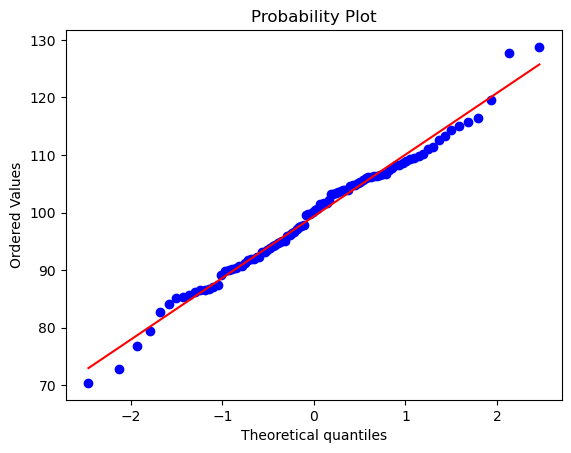

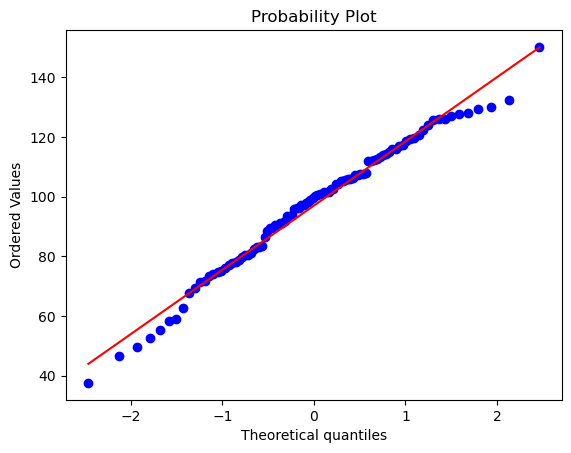

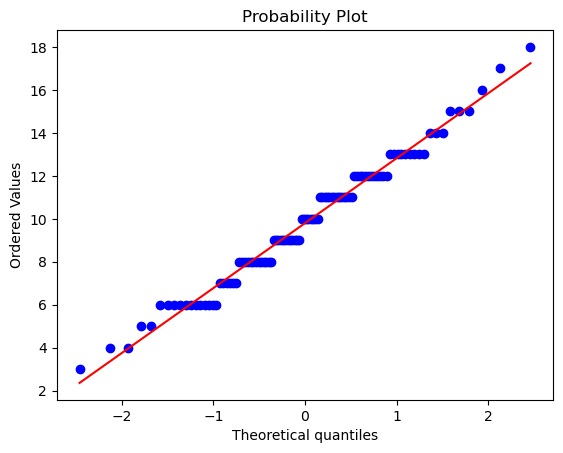

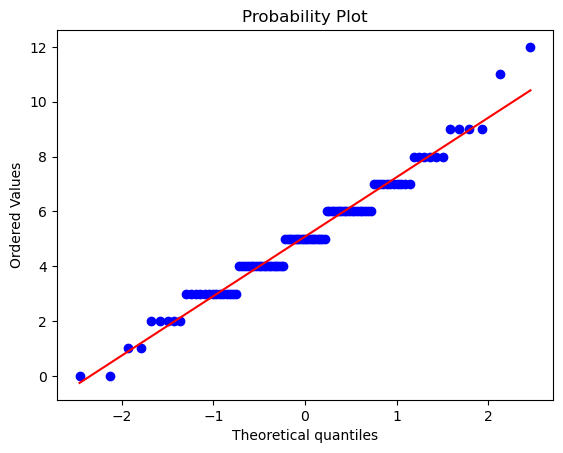

In [12]:
#Testing for normality using qq-plot
stats.probplot(moreS1, plot=plt)
plt.show()
stats.probplot(moreS2, plot=plt)
plt.show()
stats.probplot(binvar, plot=plt)
plt.show()
stats.probplot(poisvar, plot=plt)
plt.show()